In [36]:
import tensorflow as tf
import keras 
from keras.layers import Dense
from keras.models import Sequential

import matplotlib.pyplot as plt

In [37]:
(x_train,y_train), (x_test,y_test) = keras.datasets.mnist.load_data()

x_train = x_train.reshape(-1,28*28)/255.0
x_test = x_test.reshape(-1,28*28)/ 255.0

mnist_model = Sequential()
mnist_model.add(Dense(512, activation='relu', input_shape = (784,)))
mnist_model.add(Dense(10, activation='softmax'))

mnist_class_name = ['0','1','2','3','4','5','6','7','8','9']

mnist_model.compile(loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'], optimizer = 'adam')
mnist_model.fit(x_train, y_train, epochs = 10, validation_data=(x_test,y_test))

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2004 - accuracy: 0.9414 - val_loss: 0.1044 - val_accuracy: 0.9660
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0801 - accuracy: 0.9752 - val_loss: 0.0831 - val_accuracy: 0.9728
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0527 - accuracy: 0.9838 - val_loss: 0.0769 - val_accuracy: 0.9758
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0358 - accuracy: 0.9887 - val_loss: 0.0651 - val_accuracy: 0.9804
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0274 - accuracy: 0.9911 - val_loss: 0.0735 - val_accuracy: 0.9788
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0220 - accuracy: 0.9925 - val_loss: 0.0734 - val_accuracy: 0.9804
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0160 - accuracy: 0.9948 - val_loss: 0.0637 - val_accuracy:

In [39]:
MODEL_DIR = '/home/model1'
version = 1
import tempfile
import os
mnist_export_path = os.path.join(MODEL_DIR, str(version))

tf.keras.models.save_model(
    mnist_model,
    mnist_export_path,
    overwrite = True,
    include_optimizer = True,
    save_format = None,
    signatures = None,
    options= None
)
# mnist_export_path


INFO:tensorflow:Assets written to: /home/model1/1/assets


In [40]:
!ls -l {mnist_export_path}

total 76
drwxr-xr-x 2 root root  4096 Sep 11 12:38 assets
-rw-r--r-- 1 root root 67265 Sep 11 12:38 saved_model.pb
drwxr-xr-x 2 root root  4096 Sep 11 12:38 variables


In [41]:
!echo "deb http://storage.googleapis.com/tensorflow-serving-apt stable tensorflow-model-server tensorflow-model-server-universal" | tee /etc/apt/sources.list.d/tensorflow-serving.list && \
curl https://storage.googleapis.com/tensorflow-serving-apt/tensorflow-serving.release.pub.gpg | apt-key add -
!apt update

deb http://storage.googleapis.com/tensorflow-serving-apt stable tensorflow-model-server tensorflow-model-server-universal
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2943  100  2943    0     0   159k      0 --:--:-- --:--:-- --:--:--  159k
OK
Hit:1 http://storage.googleapis.com/tensorflow-serving-apt stable InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease
Ign:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:7 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:8 http://ppa.launc

In [42]:
!apt-get install tensorflow-model-server

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tensorflow-model-server is already the newest version (2.3.0).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 77 not upgraded.


In [44]:
os.environ['MODEL_DIR'] = MODEL_DIR

In [45]:
%%bash --bg
nohup tensorflow_model_server \
  --rest_api_port=8501 \
  --model_name=mnist \
  --model_config_file=/home/models.config >server.log 2>&1

Starting job # 3 in a separate thread.


In [59]:
!tail server.log

2020-09-11 12:42:18.265245: I external/org_tensorflow/tensorflow/cc/saved_model/loader.cc:183] Running initialization op on SavedModel bundle at path: /home/model2/1
2020-09-11 12:42:18.267883: I external/org_tensorflow/tensorflow/cc/saved_model/loader.cc:303] SavedModel load for tags { serve }; Status: success: OK. Took 18972 microseconds.
2020-09-11 12:42:18.268298: I tensorflow_serving/servables/tensorflow/saved_model_warmup_util.cc:59] No warmup data file found at /home/model2/1/assets.extra/tf_serving_warmup_requests
2020-09-11 12:42:18.268390: I tensorflow_serving/core/loader_harness.cc:87] Successfully loaded servable version {name: fashion version: 1}
2020-09-11 12:42:18.269314: I tensorflow_serving/model_servers/server.cc:367] Running gRPC ModelServer at 0.0.0.0:8500 ...
[warn] getaddrinfo: address family for nodename not supported
[evhttp_server.cc : 223] NET_LOG: Couldn't bind to port 8501
[evhttp_server.cc : 63] NET_LOG: Server has not been terminated. Force termination now

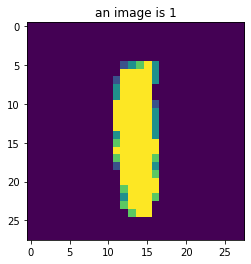

In [60]:
def show(idx,title):
  plt.figure()
  plt.imshow(x_test[idx].reshape(28,28))
  plt.title(title)

import random
rand = random.randint(0, len(x_test)-1)
show(rand, 'an image is {}'.format(mnist_class_name[y_test[rand]]))



In [61]:
import json
data = json.dumps({'signature_name':'serving_default', 'instances':x_test[0:6].tolist()})
headers = {'content-type':'application/json'}

In [72]:
y_test.shape

(10000,)

[[1.24893643e-06, 6.8789177e-08, 2.28906083e-06, 1.4259065e-07, 1.24799226e-06, 0.00682571903, 5.80701681e-06, 0.0121623185, 0.000639763195, 0.980361462], [0.000407060928, 3.52355234e-09, 0.989000678, 8.42828285e-06, 0.0027730423, 4.35868925e-13, 0.00779107539, 4.65168e-18, 1.97131194e-05, 1.41665932e-11], [1.7460701e-06, 0.999963284, 1.14773602e-09, 2.11825973e-05, 1.35427772e-05, 2.39436266e-11, 5.19369259e-08, 7.88576565e-11, 9.59768158e-08, 2.91186e-11]]


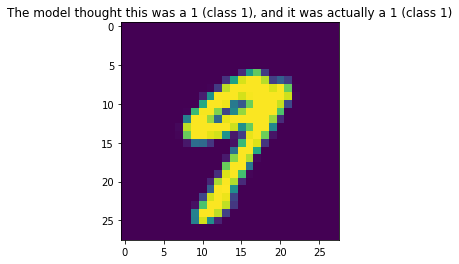

In [78]:
import requests
json_response = requests.post('http://localhost:8501/v1/models/mnist:predict',data=data, headers=headers)
prediction = json.loads(json_response.text)['predictions']

json_response

# for i in range(1,len(data)):
#   show(i, 'The model thought this was a {} (class {}), and it was actually a {} (class {})'.format(
#     mnist_class_name[np.argmax(predictions[i])], np.argmax(predictions[i]), mnist_class_name[y_test[i]], y_test[i]))
  
print(predictions)
show(20, 'The model thought this was a {} (class {}), and it was actually a {} (class {})'.format(
  mnist_class_name[np.argmax(predictions[2])], np.argmax(predictions[2]), mnist_class_name[y_test[2]], y_test[2]))


In [ ]:
## model 2

In [46]:

# import tensorflow as tf
# from tensorflow import keras

# # Helper libraries
# import numpy as np
# import matplotlib.pyplot as plt
# import os

In [47]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# scale the values to 0.0 to 1.0
train_images = train_images / 255.0
test_images = test_images / 255.0

# reshape for feeding into the model
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

print('\ntrain_images.shape: {}, of {}'.format(train_images.shape, train_images.dtype))
print('test_images.shape: {}, of {}'.format(test_images.shape, test_images.dtype))


train_images.shape: (60000, 28, 28, 1), of float64
test_images.shape: (10000, 28, 28, 1), of float64


In [48]:
model = keras.Sequential([
  keras.layers.Conv2D(input_shape=(28,28,1), filters=8, kernel_size=3, 
                      strides=2, activation='relu', name='Conv1'),
  keras.layers.Flatten(),
  keras.layers.Dense(10, activation=tf.nn.softmax, name='Softmax')
])
model.summary()

testing = False
epochs = 5

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=epochs)

test_loss, test_acc = model.evaluate(test_images, test_labels)
print('\nTest accuracy: {}'.format(test_acc))

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv1 (Conv2D)               (None, 13, 13, 8)         80        
_________________________________________________________________
flatten_1 (Flatten)          (None, 1352)              0         
_________________________________________________________________
Softmax (Dense)              (None, 10)                13530     
Total params: 13,610
Trainable params: 13,610
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5433 - accuracy: 0.8108
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4073 - accuracy: 0.8566
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3718 - accuracy: 0.8702
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.

In [50]:
# Fetch the Keras session and save the model
# The signature definition is defined by the input and output tensors,
# and stored with the default serving key
import tempfile

# MODEL_DIR = tempfile.gettempdir()
MODEL_DIR = '/home/model2'
version = 1
export_path = os.path.join(MODEL_DIR, str(version))
print('export_path = {}\n'.format(export_path))

tf.keras.models.save_model(
    model,
    export_path,
    overwrite=True,
    include_optimizer=True,
    save_format=None,
    signatures=None,
    options=None
)

print('\nSaved model:')
!ls -l {export_path}


class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

export_path = /home/model2/1

INFO:tensorflow:Assets written to: /home/model2/1/assets

Saved model:
total 84
drwxr-xr-x 2 root root  4096 Sep 11 12:41 assets
-rw-r--r-- 1 root root 75188 Sep 11 12:41 saved_model.pb
drwxr-xr-x 2 root root  4096 Sep 11 12:41 variables


In [51]:
# This is the same as you would do from your command line, but without the [arch=amd64], and no sudo
# You would instead do:
# echo "deb [arch=amd64] http://storage.googleapis.com/tensorflow-serving-apt stable tensorflow-model-server tensorflow-model-server-universal" | sudo tee /etc/apt/sources.list.d/tensorflow-serving.list && \
# curl https://storage.googleapis.com/tensorflow-serving-apt/tensorflow-serving.release.pub.gpg | sudo apt-key add -

# !echo "deb http://storage.googleapis.com/tensorflow-serving-apt stable tensorflow-model-server tensorflow-model-server-universal" | tee /etc/apt/sources.list.d/tensorflow-serving.list && \
# curl https://storage.googleapis.com/tensorflow-serving-apt/tensorflow-serving.release.pub.gpg | apt-key add -
# !apt update

In [52]:
# !apt-get install tensorflow-model-server

In [53]:
%%bash --bg 
nohup tensorflow_model_server \
  --rest_api_port=8501 \
  --model_name=fashion \
  --model_config_file=/home/models.config >server.log 2>&1



Starting job # 4 in a separate thread.


In [54]:
!tail server.log

2020-09-11 12:42:18.265245: I external/org_tensorflow/tensorflow/cc/saved_model/loader.cc:183] Running initialization op on SavedModel bundle at path: /home/model2/1
2020-09-11 12:42:18.267883: I external/org_tensorflow/tensorflow/cc/saved_model/loader.cc:303] SavedModel load for tags { serve }; Status: success: OK. Took 18972 microseconds.
2020-09-11 12:42:18.268298: I tensorflow_serving/servables/tensorflow/saved_model_warmup_util.cc:59] No warmup data file found at /home/model2/1/assets.extra/tf_serving_warmup_requests
2020-09-11 12:42:18.268390: I tensorflow_serving/core/loader_harness.cc:87] Successfully loaded servable version {name: fashion version: 1}
2020-09-11 12:42:18.269314: I tensorflow_serving/model_servers/server.cc:367] Running gRPC ModelServer at 0.0.0.0:8500 ...
[warn] getaddrinfo: address family for nodename not supported
[evhttp_server.cc : 223] NET_LOG: Couldn't bind to port 8501
[evhttp_server.cc : 63] NET_LOG: Server has not been terminated. Force termination now

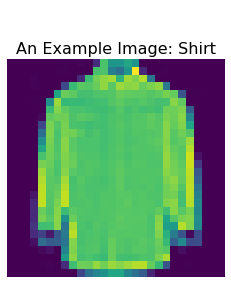

In [55]:
def show1(idx, title):
  plt.figure()
  plt.imshow(test_images[idx].reshape(28,28))
  plt.axis('off')
  plt.title('\n\n{}'.format(title), fontdict={'size': 16})

import random
rando = random.randint(0,len(test_images)-1)
show1(rando, 'An Example Image: {}'.format(class_names[test_labels[rando]]))

In [57]:
import json
data1 = json.dumps({"signature_name": "serving_default", "instances": test_images[0:3].tolist()})
# print('Data: {} ... {}'.format(data[:50], data[len(data)-52:]))

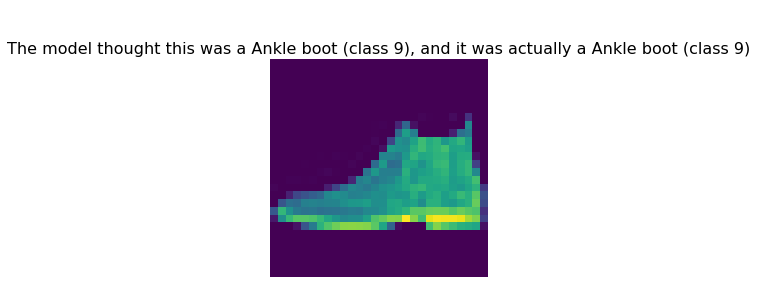

In [58]:
!pip install -q requests

import requests
headers = {"content-type": "application/json"}
json_response = requests.post('http://localhost:8501/v1/models/fashion:predict', data=data1, headers=headers)
predictions = json.loads(json_response.text)['predictions']
json_response
show1(0, 'The model thought this was a {} (class {}), and it was actually a {} (class {})'.format(
  class_names[np.argmax(predictions[0])], np.argmax(predictions[0]), class_names[test_labels[0]], test_labels[0]))